In [146]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
from cartogram_geopandas import make_cartogram


In [108]:
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
url = 'https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.csv'
data = pd.read_csv(url)
gdf = gdf.rename(columns={"iso_a3":"iso_code"})

In [122]:
total_cases = data.loc[:,["iso_code","new_cases_per_million"]]
total_cases = total_cases.groupby(['iso_code'])["new_cases_per_million"].sum().reset_index()
total_cases = total_cases.rename(columns={"new_cases_per_million":"total_cases_per_million"})

In [123]:
gdf = gdf.merge(total_cases, on='iso_code')
gdf = gdf[gdf['geometry'].notna()]

In [125]:
gdf.tail()

,pop_est,continent,name,iso_code,gdp_md_est,geometry,new_cases_per_million_x,new_cases_per_million_y,total_cases
167,2083459.0,Europe,North Macedonia,MKD,12547,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",165672.057,165672.057,165672.057
168,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",363418.601,363418.601,363418.601
169,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",460271.548,460271.548,460271.548
170,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",123638.577,123638.577,123638.577
171,11062113.0,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",1683.123,1683.123,1683.123


<AxesSubplot:>

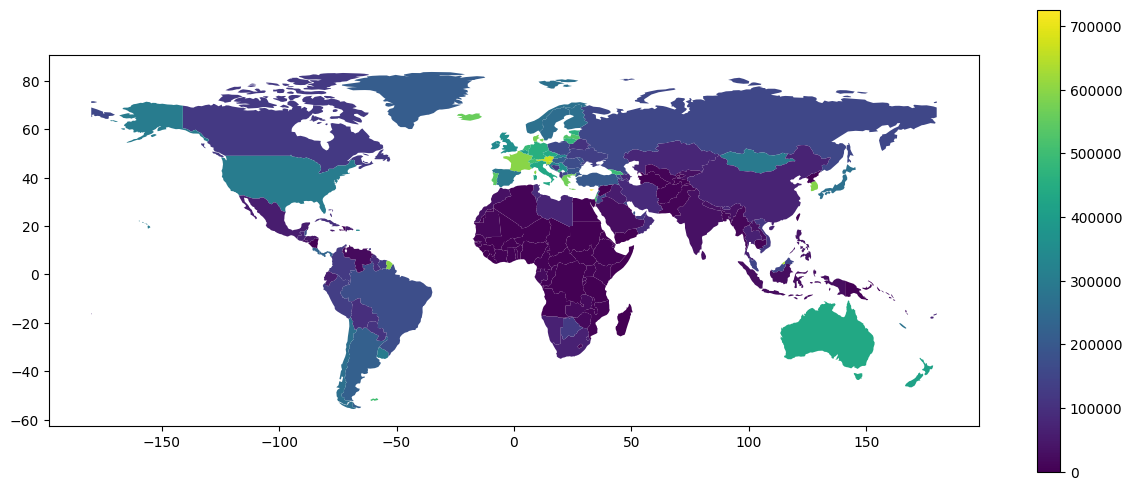

In [129]:
gdf.plot("total_cases", legend=True,figsize=(15,6))

In [140]:
gdf['gdp_per_cap'] = gdf.gdp_md_est / gdf.pop_est * 1000000
gdf['total_cases_to_gdp_per_cap'] = gdf.total_cases / gdf.gdp_per_cap 

<AxesSubplot:>

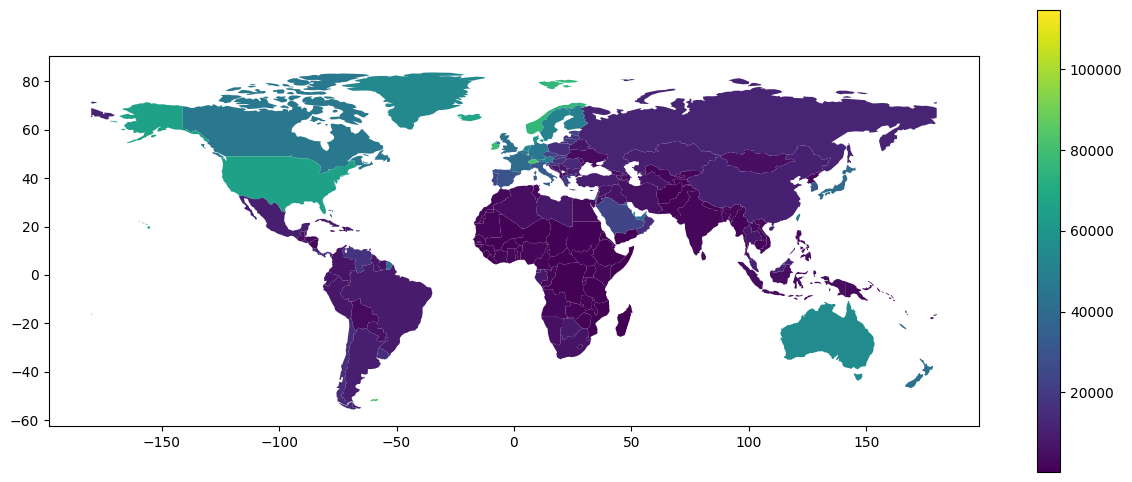

In [174]:
gdf.plot("gdp_per_cap", legend=True,figsize=(15,6))

In [170]:
europe_gdf = gdf.loc[gdf["continent"]=="Europe"]

<AxesSubplot:>

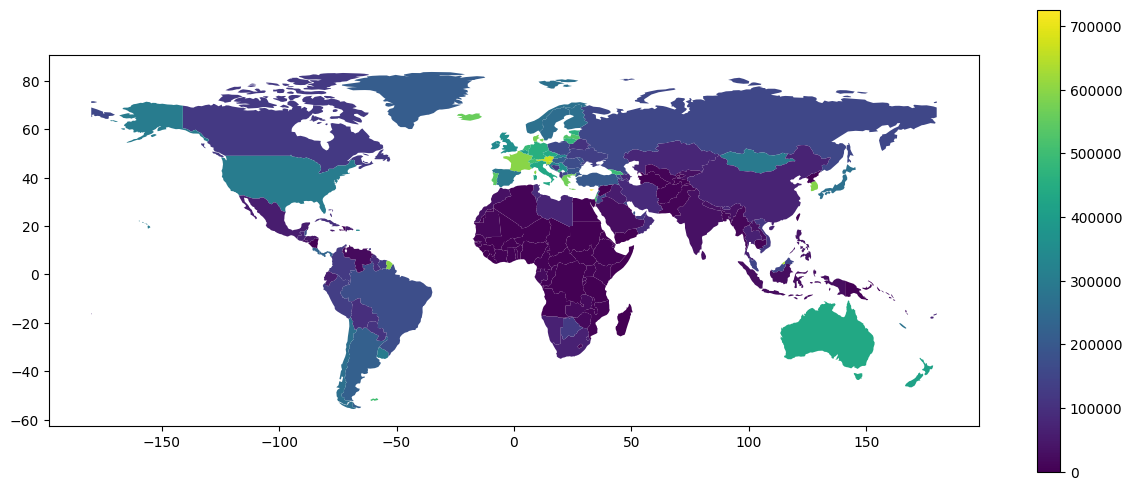

In [172]:
gdf.plot("total_cases", legend=True,figsize=(15,6))